# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Set up splinter 
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
# Visit the url
browser.visit(url)

#Parse the html
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
print(soup.prettify())


<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:
* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
table_data = []

# Find the table in the HTML
#searches for the first <table> element with the class "table"
table = soup.find('table', class_="table")

# Extract the table headers
#Finds all <th> elements within the <table>.
header = table.find_all('th')

#Loops through each <th> element, extracts the text inside it using .text, and removes any extra spaces with .strip().
table_header = [head.text.strip() for head in header]


# Loop through the scraped data to create a list of rows
#Finds all rows (<tr> elements) in the table, except the first one because it is the header row which is already extracted.
rows = table.find_all('tr')[1:]

#Iterates over each row to extract data from the table cells (<td> elements)
for row in rows:
#Finds all <td> (table data) elements in the current row
    td_data = row.find_all('td')

#Loops through each <td>, extracts its text, and removes any extra spaces.   
    row_data = [info.text.strip() for info in td_data]
    
#Appends the cleaned row data (a list) to table_data.
    table_data.append(row_data)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data = pd.DataFrame(table_data, columns=table_header)

In [8]:
# Confirm DataFrame was created successfully
mars_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_data.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Changing columns to integer data type and filling missing values with 0
mars_data[['sol', 'ls', 'month']] = mars_data[['sol', 'ls', 'month']].fillna(0).astype(int)

# Changing columns to float data type and filling missing values with 0
mars_data[['min_temp' , 'pressure']] = mars_data[['min_temp', 'pressure']].fillna(0).astype(float)

# Changing terrestrial_date column to datetime format.
mars_data['terrestrial_date']= pd.to_datetime(mars_data['terrestrial_date'])


In [11]:
# Confirm type changes were successful by examining data types again
mars_data.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
#  Extracts the month column from the mars_data DataFrame and count the number of unique (distinct) values in the column.

unique_months = mars_data['month'].nunique()
unique_months

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
#Extracts the sol column from the mars_data DataFrame and count the number of non-null values in the column.

martian_days_data = mars_data['sol'].count()
martian_days_data 

1867

In [14]:
# 3. What is the average minimum temperature by month?
# Group the mars_data DataFrame by the month column,then select the min_temp column from each group.
# Then calculate the mean (average) of the min_temp values within each group (i.e., for each month).

avg_min_temp = mars_data.groupby('month')['min_temp'].mean()
avg_min_temp 

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

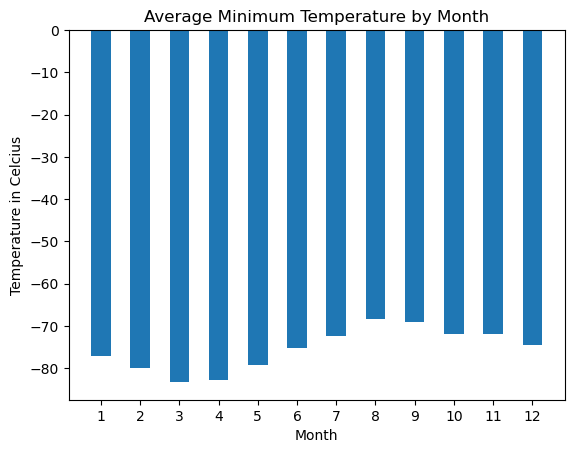

In [15]:
# Plot the average minimum temperature by month
# Create a bar chart where the height of each bar represents the average minimum temperature for each month
#avg_min_temp.index is the x-axis values ,avg_min_temp.values is the y-axis values,width=0.5 specifies the width of the bar

plt.bar(avg_min_temp.index, avg_min_temp.values, width=0.5) 

# Add a title to the plot.
plt.title('Average Minimum Temperature by Month')
#Add a label to the x-axis and y-axis.
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')

#Customize the x-axis ticks
plt.xticks(avg_min_temp.index)

#Show the plot
plt.show()

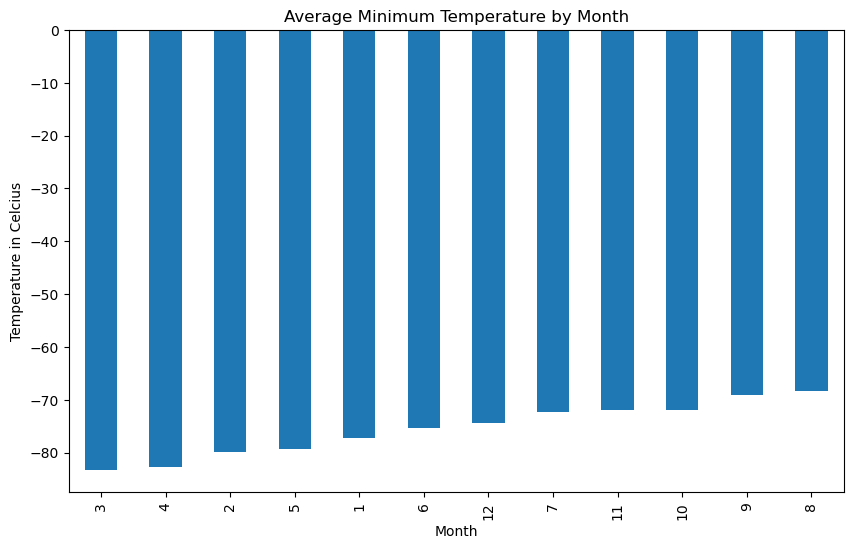

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the avg_min_temp Series in ascending order
avg_min_temp_sorted = avg_min_temp.sort_values() 

# Sets the size of the figure 
plt.figure(figsize=(10, 6))

# Create a bar plot using the sorted data 
avg_min_temp_sorted.plot(kind='bar', y=avg_min_temp_sorted.values)

# Add a title to the plot.
plt.title('Average Minimum Temperature by Month')

# Add a label to the x-axis and y-axis.
plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')

# Show the plot
plt.show()

The coldest month on Mars is March and the hottest month is August.

In [17]:
# 4. What is the average pressure by month?
# Group the mars_data DataFrame by the month column,then select the pressure column from each group.
# Then calculate the mean (average) of pressure values within each group (i.e., for each month).

avg_pressure = mars_data.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

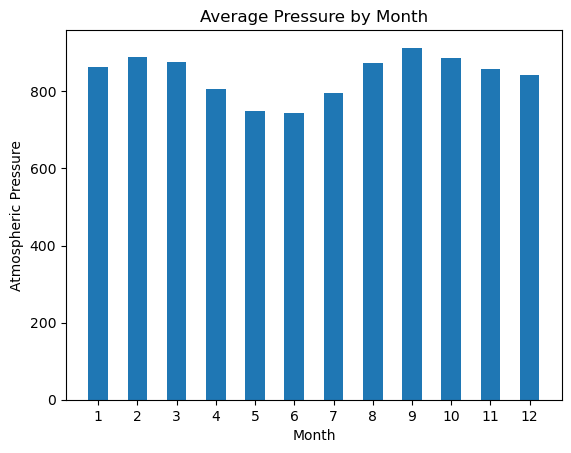

In [18]:
# Plot the average pressure by month
# Create a bar chart where the height of each bar represents the average pressure for each month
#avg_pressure.index is the x-axis values ,avg_pressure.values is the y-axis values,width=0.5 specifies the width of the bar

plt.bar(avg_pressure.index, avg_pressure.values, width=0.5)

# Add a title to the plot.
plt.title('Average Pressure by Month')

# Add a label to the x-axis and y-axis.
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

#Customize the x-axis ticks
plt.xticks(avg_pressure.index) 

# Show the plot
plt.show()

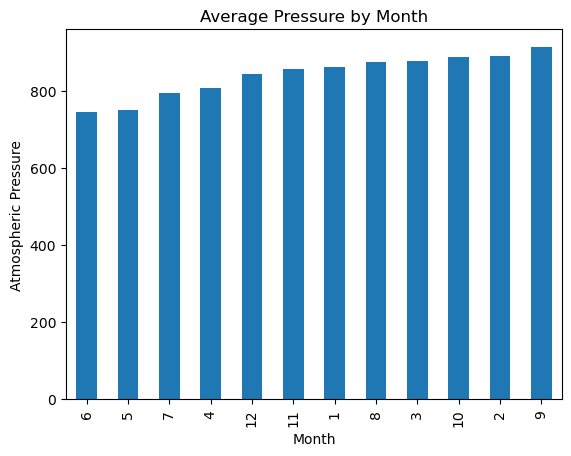

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Sort the avg_pressure Series in ascending order
avg_pressure_sorted = avg_pressure.sort_values()  

# Plot the bar graph
avg_pressure_sorted.plot(kind='bar', y=avg_pressure_sorted.values)

# Add a title to the plot.
plt.title('Average Pressure by Month')

# Add a label to the x-axis and y-axis.
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Show the plot
plt.show()

The lowest atmospheric pressure on Mars is in the month of June(750 approx) and the highest is in the month of September(950 appprox).

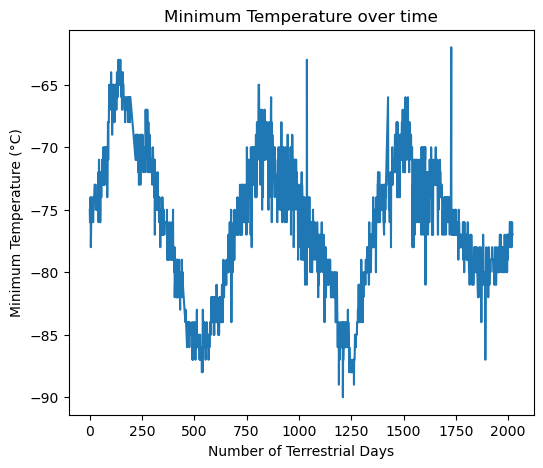

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Convert terrestrial_date to datetime
mars_data["terrestrial_date"] = pd.to_datetime(mars_data["terrestrial_date"])

# Calculates the number of days that have passed since the earliest terrestrial_date
# .min() finds the earliest date in the terrestrial_date column.
# mars_data["number_of_days"] subtracts the earliest date from each value in the terrestrial_date column, resulting in Timedelta object
# .dt.days converts the Timedelta object into the number of days as an integer.

mars_data["number_of_days"] = (mars_data["terrestrial_date"] - mars_data["terrestrial_date"].min()).dt.days

# Plot the graph
plt.figure(figsize=(6, 5))

# Plots a line graph using the number_of_days as the x-axis and min_temp as the y-axis.
plt.plot(mars_data["number_of_days"], mars_data["min_temp"], linestyle='-')

# Add a title to the plot.
plt.title("Minimum Temperature over time")

# Add a label to the x-axis and y-axis.
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature (°C)")

# Show the plot
plt.show()


#### Minimum Temperature

-The mnimum temperature is -90 degree celcius approx.

#### Atmospheric Pressure

The atmospheric pressure is minimum (700) in the month of June and maximum (950) in September.

#### Year Length

The year length is the duration Mars takes to complete one full orbit around the sun. From, it is calculates as one whole cycle, which is approx (900 - 250 = 650) earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_data.to_csv("mars_data.csv", encoding='utf8', index=False)

In [22]:
browser.quit()